## Using delta_v and delta_x from simulation and comparig with $c_{s, CO}$

In [1]:
%matplotlib inline

#import sys
import numpy as np
#np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
import matplotlib.colors as cm
import pynbody
from michaels_functions import (center_and_r_vir, remove_bulk_velocity,
                                read_unit_from_info)
from matplotlib.colors import LogNorm
from matplotlib.pyplot import figure

In [2]:
run = "hydro_59"
out = "output_00050"
path = "bulk1/data_2/" + run + "/output/"
data = pynbody.load(path + out)
aexp = data.properties['a']
data.physical_units()

r_vir = center_and_r_vir(data, aexp, path)
remove_bulk_velocity(data)
r_e = 0.1 * r_vir

sph_5 = pynbody.filt.Sphere(radius='%f kpc' % r_e)
region = data[sph_5]

omega_b, unit_l, unit_d, unit_t = read_unit_from_info(data)

('shifting on Stars:', SimArray([ 0.00308878, -0.03302971, -0.04676732], 'kpc'))
('virial radius:', SimArray(152.40432611, 'kpc'))


In [3]:
m_p = pynbody.array.SimArray(1.672621e-24, "g")
G = pynbody.array.SimArray(6.6732e-8, "cm**3 g**-1 s**-2")
T_mean = pynbody.array.SimArray(10., "K")
K_b = pynbody.array.SimArray(1.380622e-16, "g cm**2 s**-2 K**-1")
K_b_ev = pynbody.array.SimArray(8.617e-5, "eV K**-1")
K_b_erg = pynbody.array.SimArray(1.380622e-16, "erg K**-1")
c_cgs = pynbody.array.SimArray(2.9979245e10, "cm s**-1")
h_ev = pynbody.array.SimArray(4.135667e-15, "eV s")
mH_cgs = pynbody.array.SimArray(1.6735575e-24, 'g')  # hydrogen mass
eV_to_ergs = pynbody.array.SimArray(1.60218e-12, "erg eV**-1")
L_sun = pynbody.array.SimArray(3.839e33, "erg s**-1")
M_sun = pynbody.array.SimArray(2e33, "g")

In [12]:
# X_H2_bar = np.load('outputs/debug_1.4/X_H2_bar_' + run + '_' + out + '.npy')
# X_CO_bar = np.load('outputs/debug_1.4/X_CO_bar_' + run + '_' + out + '.npy')
# mach_no_arr = np.load('outputs/debug_1.4/mach_no_arr_' + run + '_' + out + '.npy')
# n_H_mean_arr = pynbody.array.SimArray(np.load('outputs/debug_1.4/n_H_mean_arr_' + run + '_' + out + '.npy'),\
#                                       "cm**-3")
# metal_arr = np.load('outputs/debug_1.4/metal_arr_' + run + '_' + out + '.npy')
# temperature = np.load('outputs/debug_1.4/T_' + run + '_' + out + '.npy')
# l_CO_bar_1 = np.load('outputs/debug_1.4/l_CO_bar_1' + run + '_' + out + '.npy')
# l_CO_SI_bar_1 = np.load('outputs/debug_1.4/l_CO_SI_bar_1' + run + '_' + out + '.npy')
# l_CO_bar_2 = np.load('outputs/debug_1.4/l_CO_bar_2' + run + '_' + out + '.npy')
# l_CO_SI_bar_2 = np.load('outputs/debug_1.4/l_CO_SI_bar_2' + run + '_' + out + '.npy')
# m_H2_bar = np.load('outputs/debug_1.4/m_H2_bar_' + run + '_' + out + '.npy')
# M_H2_sim = region.gas["mass"].in_units('Msol') * X_H2_bar
# mass = np.load('outputs/debug_1.4/mass_' + run + '_' + out + '.npy')
# cell_width_arr = region.gas["smooth"].in_units('cm')
# n_H2_mean = pynbody.array.SimArray(X_H2_bar * n_H_mean_arr, "cm**-3")

X_H2_bar = np.load('outputs/debug_1.4/X_H2_bar_' + run + '_' + out + '.npy')
X_CO_bar = np.load('outputs/debug_1.4/X_CO_bar_' + run + '_' + out + '.npy')
mach_no_arr = np.load('outputs/debug_1.4/mach_no_arr_' + run + '_' + out + '.npy')
n_H_mean_arr = pynbody.array.SimArray(np.load('outputs/debug_1.4/n_H_mean_arr_' + run + '_' + out + '.npy'),\
                                      "cm**-3")
metal_arr = np.load('outputs/debug_1.4/metal_arr_' + run + '_' + out + '.npy')
temperature = np.load('outputs/debug_1.4/T_' + run + '_' + out + '.npy')
l_CO_bar = np.load('outputs/debug_1.4/l_CO_bar_' + run + '_' + out + '.npy')
l_CO_SI_bar = np.load('outputs/debug_1.4/l_CO_SI_bar_' + run + '_' + out + '.npy')
m_H2_bar = np.load('outputs/debug_1.4/m_H2_bar_' + run + '_' + out + '.npy')
mass = np.load('outputs/debug_1.4/mass_' + run + '_' + out + '.npy')
cell_width_arr = region.gas["smooth"].in_units('cm')
n_H2_mean = pynbody.array.SimArray(X_H2_bar * n_H_mean_arr, "cm**-3")

In [13]:
M_H2_galaxy_sim = np.sum(M_H2_sim)
print M_H2_galaxy_sim/1e9
print np.log10(M_H2_galaxy_sim)

2.863026956050193
9.456825437022207


In [14]:
L_CO = np.sum(l_CO_bar*(cell_width_arr**3))
print np.log10(L_CO/L_sun)

3.879871205563546


In [15]:
mass_galaxy = np.sum(mass * X_H2_bar)
print mass_galaxy/1e9

2.863026956050193


In [16]:
mass_galaxy = np.sum(m_H2_bar/M_sun)
print mass_galaxy/1e9

2.8471647994275058


In [21]:
L_CO_SI = np.sum(l_CO_SI_bar*(cell_width_arr**3)/M_sun)
print L_CO_SI/1e8

19.479743916939796


In [23]:
alpha_CO = L_CO_SI/mass_galaxy
alpha_CO

SimArray(0.68418041, 'cm**3')

In [24]:
mass_galaxy/L_CO_SI

SimArray(1.46160279, 'cm**-3')

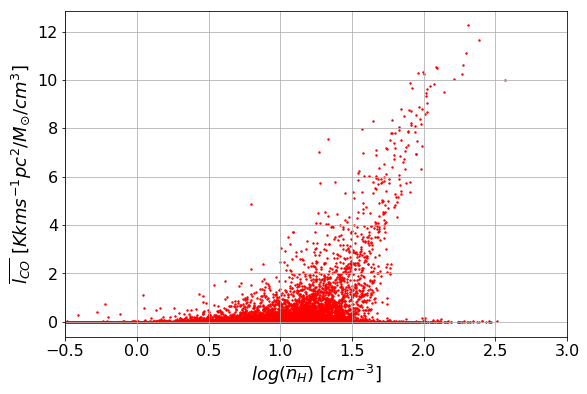

In [18]:
fig, ax = plt.subplots(figsize=(9,6))
plt.rc('figure', titlesize=18)
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize

# plt.scatter(np.log10(n_H_mean_arr), n_H2_mean/n_H_mean_arr, 
#                       c="k", label="$n_{H2, mean}/n_{H, mean}$", s=2)
plt.scatter(np.log10(n_H_mean_arr), l_CO_SI_bar/n_H_mean_arr/m_p, 
                      c="r", s=2)
plt.xlabel('$log(\overline{n_{H}}) \ [cm^{-3}]$')
plt.ylabel('$\overline{l_{CO}} \ [K km s^{-1} pc^{2}/M_{\odot}/cm^{3}]$')
# ax.set_ylim([-0.1,0.5])
ax.set_xlim([-0.5, 3])
# legend = plt.legend(loc="upper left")
# legend.legendHandles[0]._sizes = [30]
# legend.legendHandles[1]._sizes = [30]
plt.grid(b=True, which='both', axis='both')
# plt.title("$delta_{v}$ & $delta_{x}$ - from sim")
plt.savefig('outputs/debug_1.4/log(n_H_mean)vsl_CO-sim.png', 
            dpi=300, bbox_inches='tight')
plt.show()

/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


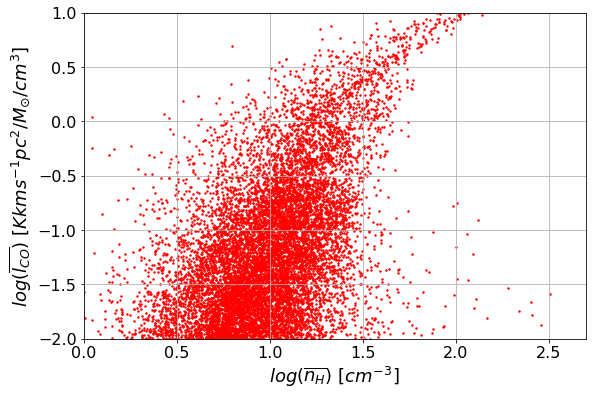

In [19]:
fig, ax = plt.subplots(figsize=(9,6))
plt.rc('figure', titlesize=18)
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize

# plt.scatter(np.log10(n_H_mean_arr), n_H2_mean/n_H_mean_arr, 
#                       c="k", label="$n_{H2, mean}/n_{H, mean}$", s=2)
plt.scatter(np.log10(n_H_mean_arr), np.log10(l_CO_SI_bar/n_H_mean_arr/m_p), 
                      c="r", s=2)
plt.xlabel('$log(\overline{n_{H}}) \ [cm^{-3}]$')
plt.ylabel('$log(\overline{l_{CO}}) \ [K km s^{-1} pc^{2}/M_{\odot}/cm^{3}]$')
ax.set_ylim([-2,1.0])
ax.set_xlim([0, 2.7])
# legend = plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
# legend.legendHandles[0]._sizes = [30]
# legend.legendHandles[1]._sizes = [30]
plt.grid(b=True, which='both', axis='both')
# plt.title("$delta_{v}$ & $delta_{x}$ - from sim")
plt.savefig('outputs/debug_1.4/log(n_H_mean)vsothers-zoomed-comp.png', 
            dpi=300, bbox_inches='tight')
plt.show()

In [6]:
# L_CO_1 = np.sum(l_CO_bar_1*(cell_width_arr**3))
# print np.log10(L_CO_1/L_sun)

3.879871205563546


In [7]:
# L_CO_2 = np.sum(l_CO_bar_2*(cell_width_arr**3))
# print np.log10(L_CO_2/L_sun)

2.9287528124842295


In [8]:
# mass_galaxy = np.sum(mass * X_H2_bar)
# print mass_galaxy/1e9

2.863026956050193


In [9]:
# L_CO_SI_1 = np.sum(l_CO_SI_bar_1*(cell_width_arr**3)/M_sun)
# print L_CO_SI_1/1e8

19.479743916939796


In [10]:
# L_CO_SI_2 = np.sum(l_CO_SI_bar_2*(cell_width_arr**3)/M_sun)
# print L_CO_SI_2/1e8

2.180041947532912


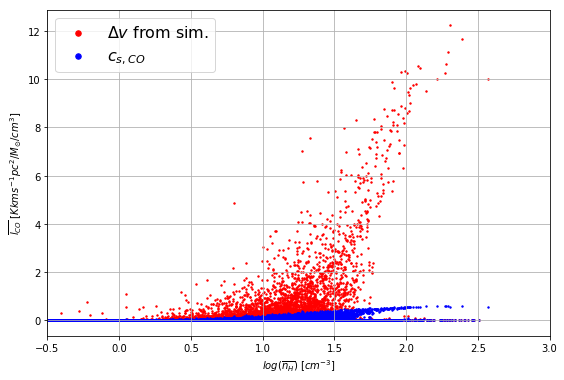

In [11]:
# fig, ax = plt.subplots(figsize=(9,6))
# plt.rc('figure', titlesize=18)
# plt.rc('axes', titlesize=18)     # fontsize of the axes title
# plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
# plt.rc('legend', fontsize=16)    # legend fontsize

# # plt.scatter(np.log10(n_H_mean_arr), n_H2_mean/n_H_mean_arr, 
# #                       c="k", label="$n_{H2, mean}/n_{H, mean}$", s=2)
# plt.scatter(np.log10(n_H_mean_arr), l_CO_SI_bar_1/m_p/n_H_mean_arr, 
#                       c="r", s=2, label = "$\Delta v$ from sim.")
# plt.scatter(np.log10(n_H_mean_arr), l_CO_SI_bar_2/m_p/n_H_mean_arr, 
#                       c="b", s=2, label = "$c_{s, CO}$")
# plt.xlabel('$log(\overline{n_{H}}) \ [cm^{-3}]$')
# plt.ylabel('$\overline{l_{CO}} \ [K km s^{-1} pc^{2}/M_{\odot}/cm^{3}]$')
# # ax.set_ylim([-0.1,0.5])
# ax.set_xlim([-0.5, 3])
# legend = plt.legend(loc="upper left")
# legend.legendHandles[0]._sizes = [30]
# legend.legendHandles[1]._sizes = [30]
# plt.grid(b=True, which='both', axis='both') 
# # plt.title("$delta_{v}$ & $delta_{x}$ - from sim")
# plt.savefig('outputs/debug_1.4/log(n_H_mean)vsl_CO-sim.png', 
#             dpi=300, bbox_inches='tight')
# plt.show()

/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


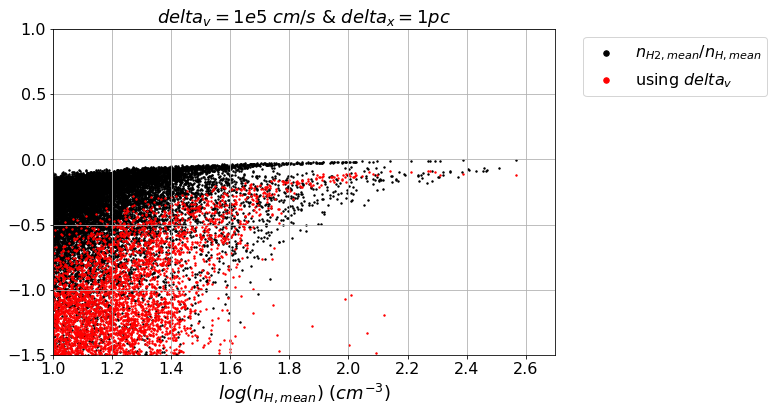

In [10]:
# fig, ax = plt.subplots(figsize=(9,6))
# plt.rc('figure', titlesize=18)
# plt.rc('axes', titlesize=18)     # fontsize of the axes title
# plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
# plt.rc('legend', fontsize=16)    # legend fontsize

# plt.scatter(np.log10(n_H_mean_arr), np.log10(n_H2_mean/n_H_mean_arr), 
#                       c="k", label="$n_{H2, mean}/n_{H, mean}$", s=2)
# plt.scatter(np.log10(n_H_mean_arr), np.log10(l_CO_SI_bar/m_p/n_H_mean_arr), 
#                       c="r", s=2, label="using $delta_{v}$")
# plt.xlabel('$log(n_{H, mean}) \ (cm^{-3})$')
# # plt.ylabel('$log(l_{CO, SI, bar}) \ (K km s^{-1} pc^{2})$')
# ax.set_ylim([-1.5,1])
# ax.set_xlim([1, 2.7])
# legend = plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
# legend.legendHandles[0]._sizes = [30]
# legend.legendHandles[1]._sizes = [30]
# plt.grid(b=True, which='both', axis='both')
# plt.title("$delta_{v} = 1e5\ cm/s$ & $delta_{x} = 1pc$")
# plt.savefig('outputs/debug_1.4/log(n_H_mean)vsothers-zoomed-comp.png', 
#             dpi=300, bbox_inches='tight')
# plt.show()

In [13]:
M_H = n_H_mean_arr * cell_width_arr**3 * m_p
M_H_galaxy = np.sum(M_H)
print M_H_galaxy/M_sun/1e10
print np.log10(M_H_galaxy/M_sun)

1.2892373104658728
10.110332865483622


/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


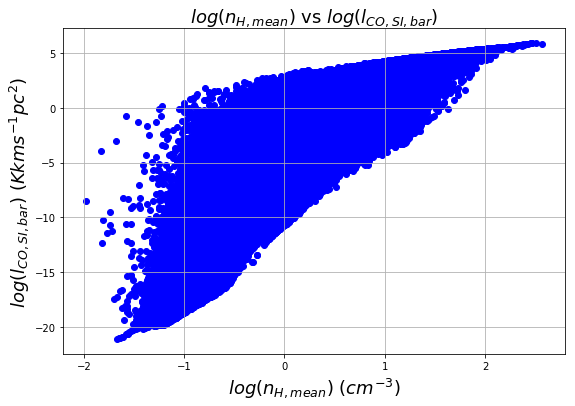

In [35]:
fig, ax = plt.subplots(figsize=(9,6))
plt.rc('figure', titlesize=18)
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.scatter(np.log10(n_H_mean_arr), np.log10(l_CO_SI_bar), 
                      c="b")
plt.xlabel('$log(n_{H, mean}) \ (cm^{-3})$')
plt.ylabel('$log(l_{CO, SI, bar}) \ (K km s^{-1} pc^{2})$')
# ax.set_ylim([-0.1,0.5])
# ax.set_xlim([-4, 7])
plt.grid(b=True, which='both', axis='both')
plt.title("$log(n_{H, mean})$ vs $log(l_{CO, SI, bar})$")
plt.savefig('outputs/debug_1.4/log(n_H_mean)vsl_CO_SI_bar.png', 
            dpi=300, bbox_inches='tight')
plt.show()

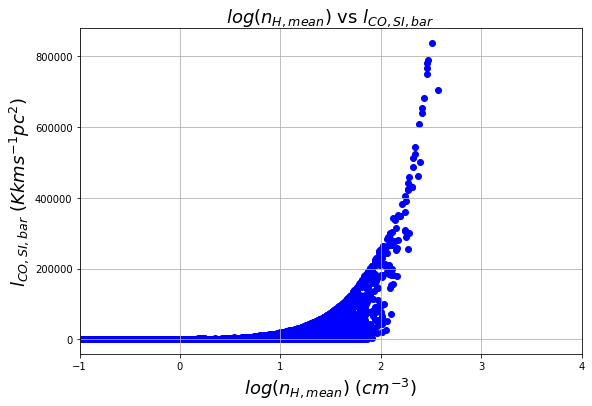

In [36]:
fig, ax = plt.subplots(figsize=(9,6))
plt.rc('figure', titlesize=18)
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.scatter(np.log10(n_H_mean_arr), l_CO_SI_bar, 
                      c="b")
plt.xlabel('$log(n_{H, mean}) \ (cm^{-3})$')
plt.ylabel('$l_{CO, SI, bar} \ (K km s^{-1} pc^{2})$')
# ax.set_ylim([-0.1,5])
ax.set_xlim([-1, 4])
plt.grid(b=True, which='both', axis='both')
plt.title("$log(n_{H, mean})$ vs $l_{CO, SI, bar}$")
plt.savefig('outputs/debug_1.4/log(n_H_mean)vsl_CO_SI_bar.png', 
            dpi=300, bbox_inches='tight')
plt.show()

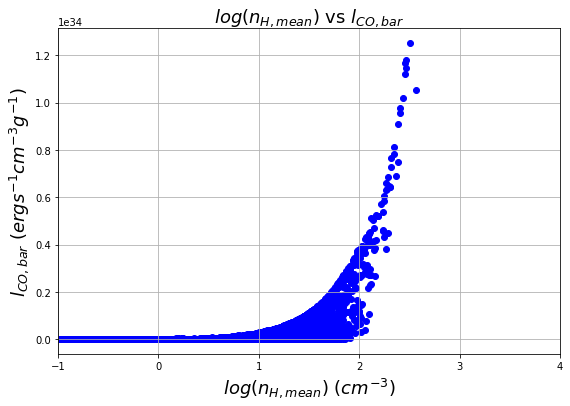

In [37]:
fig, ax = plt.subplots(figsize=(9,6))
plt.rc('figure', titlesize=18)
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.scatter(np.log10(n_H_mean_arr), l_CO_bar, 
                      c="b")
plt.xlabel('$log(n_{H, mean}) \ (cm^{-3})$')
plt.ylabel('$l_{CO, bar} \ (erg s^{-1} cm^{-3} g^{-1})$')
# ax.set_ylim([-3e-5,6e-4])
ax.set_xlim([-1, 4])
plt.grid(b=True, which='both', axis='both')
plt.title("$log(n_{H, mean})$ vs $l_{CO, bar}$")
plt.savefig('outputs/debug_1.4/log(n_H_mean)vsl_CO_bar.png', 
            dpi=300, bbox_inches='tight')
plt.show()

/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


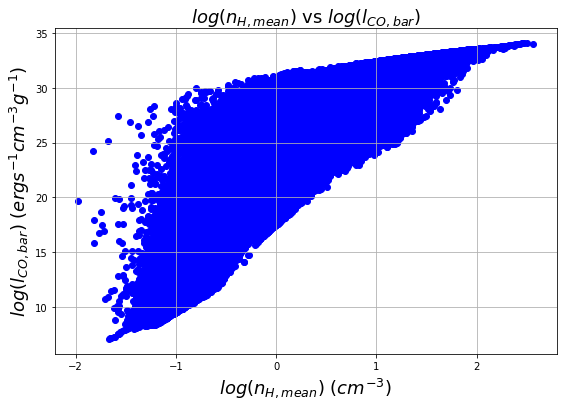

In [38]:
fig, ax = plt.subplots(figsize=(9,6))
plt.rc('figure', titlesize=18)
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.scatter(np.log10(n_H_mean_arr), np.log10(l_CO_bar), 
                      c="b")
plt.xlabel('$log(n_{H, mean}) \ (cm^{-3})$')
plt.ylabel('$log(l_{CO, bar}) \ (erg s^{-1} cm^{-3} g^{-1})$')
# ax.set_ylim([-3e-5,6e-4])
# ax.set_xlim([0, 4])
plt.grid(b=True, which='both', axis='both')
plt.title("$log(n_{H, mean})$ vs $log(l_{CO, bar})$")
plt.savefig('outputs/debug_1.4/log(n_H_mean)vslog(l_CO_bar).png', 
            dpi=300, bbox_inches='tight')
plt.show()

/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


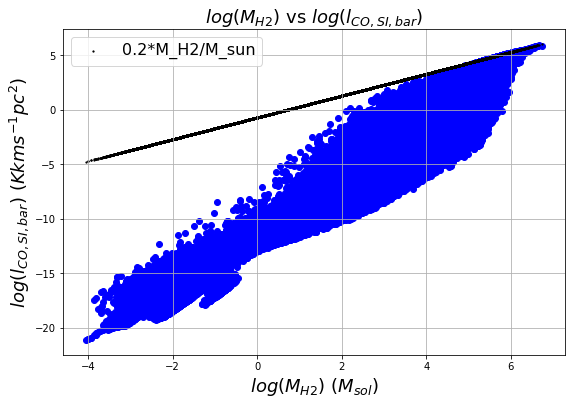

In [135]:
fig, ax = plt.subplots(figsize=(9,6))
plt.rc('figure', titlesize=18)
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.scatter(np.log10(M_H2/M_sun), np.log10(l_CO_SI_bar), 
                      c="b")
plt.scatter(np.log10(M_H2/M_sun), np.log10(0.2*M_H2/M_sun), c='k', s=1.5, label="0.2*M_H2/M_sun")
plt.xlabel('$log(M_{H2}) \ (M_{sol})$')
plt.ylabel('$log(l_{CO, SI, bar}) \ (K km s^{-1} pc^{2})$')
# ax.set_ylim([-3,7])
# ax.set_xlim([3, 7])
ax.legend(loc = 'upper left')
plt.grid(b=True, which='both', axis='both')
plt.title("$log(M_{H2})$ vs $log(l_{CO, SI, bar})$")
plt.savefig('outputs/debug_1.4/log(M_H2)vslog(l_CO_SI_bar).png', 
            dpi=300, bbox_inches='tight')
plt.show()

/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


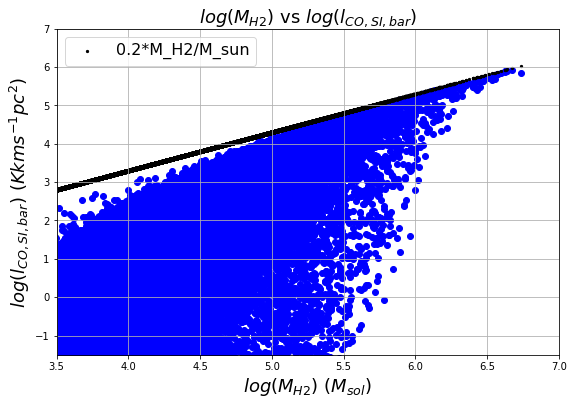

In [136]:
fig, ax = plt.subplots(figsize=(9,6))
plt.rc('figure', titlesize=18)
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.scatter(np.log10(M_H2/M_sun), np.log10(l_CO_SI_bar), 
                      c="b")
plt.scatter(np.log10(M_H2/M_sun), np.log10(0.2*M_H2/M_sun), c='k', s=5, label="0.2*M_H2/M_sun")
plt.xlabel('$log(M_{H2}) \ (M_{sol})$')
plt.ylabel('$log(l_{CO, SI, bar}) \ (K km s^{-1} pc^{2})$')
ax.set_ylim([-1.5,7])
ax.set_xlim([3.5, 7])
ax.legend(loc = 'upper left')
plt.grid(b=True, which='both', axis='both')
plt.title("$log(M_{H2})$ vs $log(l_{CO, SI, bar})$")
plt.savefig('outputs/debug_1.4/log(M_H2)vslog(l_CO_SI_bar)-zoomed.png', 
            dpi=300, bbox_inches='tight')
plt.show()

In [138]:
M_H = n_H_mean_arr * cell_width_arr**3 * m_p

In [140]:
M_H_galaxy = np.sum(M_H)
print M_H_galaxy
print M_H_galaxy/M_sun/1e10
print np.log10(M_H_galaxy/M_sun)

2.5792774764079424e+43
1.2896387382039713
10.110468070006569
